In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\allan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [33]:
SOLUTIONS = ['plaintext', 'bfv', 'ckks', 'fedphe', 'batchcrypt']

In [73]:
df_train = pd.DataFrame()
df_test  = pd.DataFrame()
for sol in SOLUTIONS:
    df_train_        = pd.read_csv(f'logs/MNIST/{sol}/train.csv')
    df_test_         = pd.read_csv(f'logs/MNIST/{sol}/evaluate.csv')
    df_train_['SOL'] = sol
    df_test_['SOL'] = sol
    
    df_train = pd.concat([df_train, df_train_])
    df_test  = pd.concat([df_test, df_test_])

In [74]:
df_train['round'] = df_train['round'].astype(int)
df_test['round']  = df_test['round'].astype(int)

filter_train = df_train['round'] < 50
df_train     = df_train[filter_train].copy()

filter_test = df_test['round'] < 50
df_test     = df_test[filter_test].copy()

In [78]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_test.columns  = df_test.columns.str.replace(' ', '')

In [79]:
df_train['time'] = df_train.apply(lambda x: x['train_time'] + x['cyfer_time'] + x['decyfer_time'], axis=1)

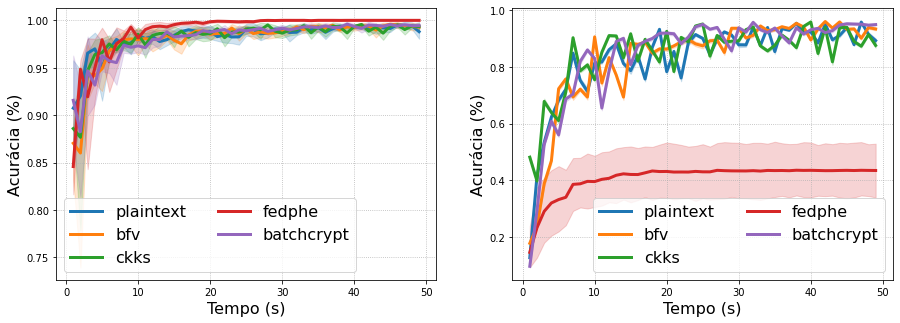

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
#palette=['gray', 'tab:orange',  'midnightblue']

for idx, sol in enumerate(df_train['SOL'].unique()):
    df_ = df_train[df_train['SOL'] == sol].copy()
    df_.reset_index(inplace=True)
    sns.lineplot(data=df_, x=df_['round'], y=df_['accuracy'], linewidth=3, label=sol, ax=ax[0])  
    
ax[0].grid(True, linestyle=':')
# ax.set_ylim(0.95,1)
ax[0].set_xlabel('Tempo (s)', size=16)
ax[0].set_ylabel('Acurácia (%)', size=16)
ax[0].legend(fontsize=16, ncols=2)

for idx, sol in enumerate(df_test['SOL'].unique()):
    df_ = df_test[df_test['SOL'] == sol].copy()
    df_.reset_index(inplace=True)
    sns.lineplot(data=df_, x=df_['round'], y=df_['accuracy'], linewidth=3, label=sol, ax=ax[1])  
    
ax[1].grid(True, linestyle=':')
# ax.set_ylim(0.95,1)
ax[1].set_xlabel('Tempo (s)', size=16)
ax[1].set_ylabel('Acurácia (%)', size=16)
ax[1].legend(fontsize=16, ncols=2)


Text(0, 0.5, 'Solução')

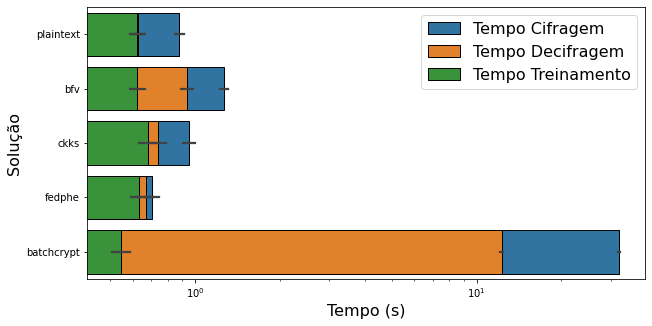

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=df_train, y='SOL', x=df_train['train_time'].values + 
                 df_train['decyfer_time'].values + df_train['cyfer_time'].values, orient='h', ec='k', label='Tempo Cifragem')
sns.barplot(data=df_train, y='SOL', x=df_train['train_time'].values + 
                 df_train['decyfer_time'].values, orient='h', ec='k', label='Tempo Decifragem')
sns.barplot(data=df_train, y='SOL', x='train_time', orient='h', ec='k', label='Tempo Treinamento')

ax.set_xlabel('Tempo (s)', size=16)
ax.set_xscale('log')
ax.legend(loc='upper right', fontsize=16)
ax.set_ylabel('Solução', size=16)

<ipython-input-92-30263b2eb842>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_train, y='SOL', x=df_train['model_size']/1_000_000, orient='h', ec='k', estimator=sum, ci=None, hue='SOL2')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


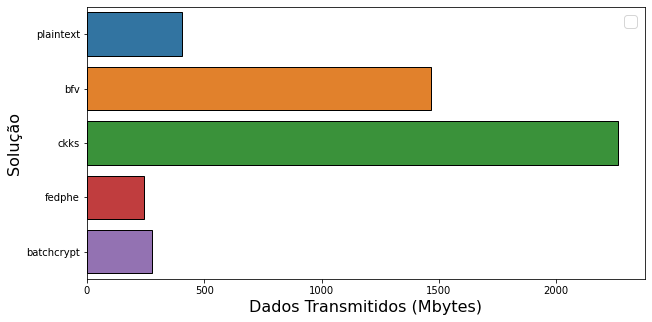

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train['SOL2'] = df_train['SOL']
palette=['lightgray', 'tab:orange',  'midnightblue']
sns.barplot(data=df_train, y='SOL', x=df_train['model_size']/1_000_000, orient='h', ec='k', estimator=sum, ci=None, hue='SOL2')    
ax.set_ylabel('Solução', size=16)
ax.set_xlabel('Dados Transmitidos (Mbytes)', size=16)
ax.legend(fontsize=16, ncols=2)

In [108]:
df_he = pd.read_csv('logs/UCIHAR/evaluate_fhe.csv', names=['round', 'cid', 'loss', 'acc', 'time'])
df_he['SOL'] = 'FHE'
df_ = pd.read_csv('logs/UCIHAR/evaluate.csv', names=['round', 'cid', 'loss', 'acc', 'time'])
df_['SOL'] = 'FedAvg'
df_l = pd.read_csv('logs/UCIHAR/evaluate_fhe_-2.csv', names=['round', 'cid', 'loss', 'acc', 'time'])
df_l['SOL'] = 'FHE Last Layer'

df_test = pd.concat([df_, df_he, df_l])

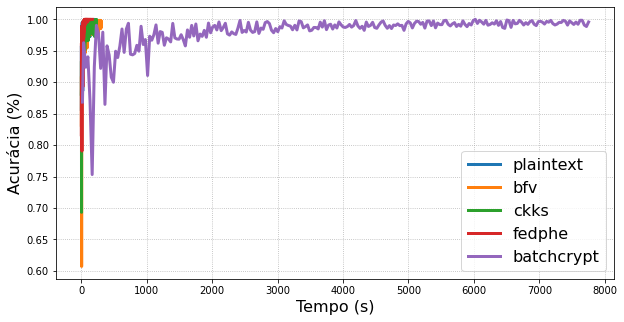

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
palette=['gray', 'tab:orange',  'midnightblue']

for idx, sol in enumerate(df['SOL'].unique()):
    df_ = df[df['SOL'] == sol].copy()
    df_.reset_index(inplace=True)
    sns.lineplot(data=df_, x=df_['time'].cumsum(), y='accuracy', linewidth=3, label=sol, ax=ax)  
    
ax.grid(True, linestyle=':')
ax.set_xlabel('Tempo (s)', size=16)
ax.set_ylabel('Acurácia (%)', size=16)
ax.legend(fontsize=16)
